In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Specify the path to your CSV file
csv_file_path = 'resources/births_data.csv'

# Read the CSV file into a DataFrame
data_df = pd.read_csv(csv_file_path)

# Print the DataFrame
data_df.head()

,State,State Abbreviation,Year,Gender,Education Level of Mother,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
0,Alabama,AL,2016,F,8th grade or less,1,1052,27.8,3116.9
1,Alabama,AL,2016,F,9th through 12th grade with no diploma,2,3436,24.1,3040.0
2,Alabama,AL,2016,F,High school graduate or GED completed,3,8777,25.4,3080.0
3,Alabama,AL,2016,F,"Some college credit, but not a degree",4,6453,26.7,3121.9
4,Alabama,AL,2016,F,"Associate degree (AA, AS)",5,2227,28.9,3174.3


In [2]:
# Check the data types of each column
data_df.dtypes

State                             object
State Abbreviation                object
Year                               int64
Gender                            object
Education Level of Mother         object
Education Level Code               int64
Number of Births                   int64
Average Age of Mother (years)    float64
Average Birth Weight (g)         float64
dtype: object

In [3]:
# Check for missing values in each column
data_df.isnull().sum()

State                            0
State Abbreviation               0
Year                             0
Gender                           0
Education Level of Mother        0
Education Level Code             0
Number of Births                 0
Average Age of Mother (years)    0
Average Birth Weight (g)         0
dtype: int64

In [4]:
# Check for duplicate rows
data_df.duplicated().sum()

0

In [5]:
# Perform summary statistics on numeric columns
data_df.describe()

,Year,Education Level Code,Number of Births,Average Age of Mother (years),Average Birth Weight (g)
count,5496.000000,5496.000000,5496.000000,5496.000000,5496.000000
mean,2018.500728,3.026201,4115.443959,29.552274,3250.887627
std,1.707554,4.733406,6687.036797,2.779735,114.456090
min,2016.000000,-9.000000,10.000000,23.100000,2451.900000
25%,2017.000000,2.000000,559.000000,27.500000,3182.200000
50%,2019.000000,4.000000,1692.000000,29.600000,3256.000000
75%,2020.000000,6.000000,5140.000000,31.800000,3330.825000
max,2021.000000,8.000000,59967.000000,35.500000,3585.700000


In [6]:
# Perform value counts on categorical columns
data_df['State'].value_counts()
data_df['Gender'].value_counts()

M    2749
F    2747
Name: Gender, dtype: int64

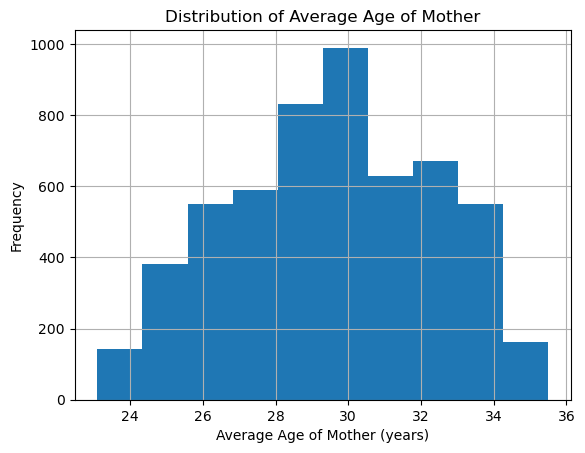

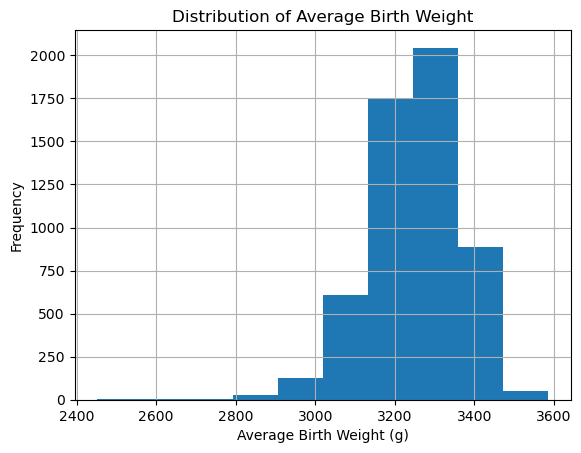

In [7]:
# Plot histograms of numeric columns
data_df['Average Age of Mother (years)'].hist()
plt.xlabel('Average Age of Mother (years)')
plt.ylabel('Frequency')
plt.title('Distribution of Average Age of Mother')
plt.show()

data_df['Average Birth Weight (g)'].hist()
plt.xlabel('Average Birth Weight (g)')
plt.ylabel('Frequency')
plt.title('Distribution of Average Birth Weight')
plt.show()

In [8]:
# Count the total number of columns entries in the DataFrame
column_entries_count = data_df.count()

column_entries_count

State                            5496
State Abbreviation               5496
Year                             5496
Gender                           5496
Education Level of Mother        5496
Education Level Code             5496
Number of Births                 5496
Average Age of Mother (years)    5496
Average Birth Weight (g)         5496
dtype: int64

In [9]:
# Calculate the average weight per gender
average_weight_per_gender = data_df.groupby('Gender')['Average Birth Weight (g)'].mean()* 0.00220462

# Rename the column to 'Average Birth Weight (LB)'
average_weight_per_gender = average_weight_per_gender.rename('Average Birth Weight (LB)')
average_weight_per_gender

Gender
F    7.042824
M    7.291029
Name: Average Birth Weight (LB), dtype: float64

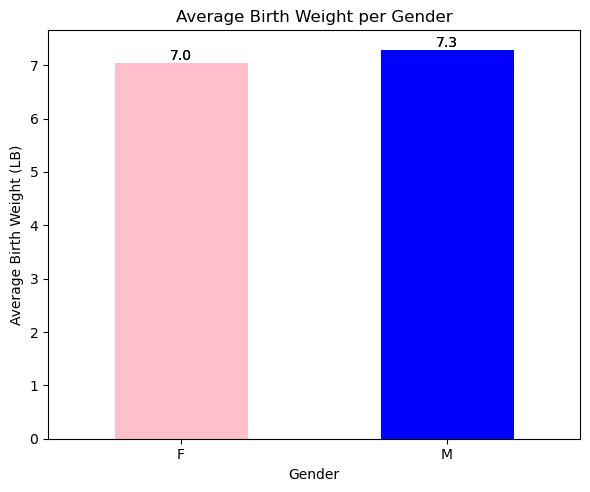

In [10]:
# Visualize the average weight per gender using a bar plot
plt.figure(figsize=(6, 5))
ax = average_weight_per_gender.plot(x='Gender', y='Average Birth Weight (g)', kind='bar', color=['pink', 'blue'])

average_weight_per_gender.plot(x='Gender', y='Average Birth Weight (g)', kind='bar', color=['pink', 'blue'])
plt.xlabel('Gender')
plt.ylabel('Average Birth Weight (LB)')
plt.title('Average Birth Weight per Gender')
plt.tight_layout()
plt.xticks(rotation=360)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

# Save the figure
plt.savefig('Output/average_weight_per_gender.png')

plt.show()